# **C.O.L.L.A.B.**
<hr style="border:2px solid black">

## Goal: 
* 
* 
<hr style="border:2px solid black">

# Imports

In [1]:
import pandas as pd
import numpy as np
from wrangle_2 import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn
import random
from itertools import product
import explore as ex

<hr style="border:2px solid black">

# **Acquire**
Plan --> **Acquire** --> Prepare --> Explore --> Model --> Deliver

* Economic Policy Institute Family Budget Calculator (Cost estimates for by family size and MSA)
* US Census Bureau - (Commute times, Household Income by Gender and Family Composition)
* Federal Bureau of Investigation (Crime Rates)

<hr style="border:2px solid black">

# **Prepare**

**Prepare Actions:**
* Merge census dataframes family_income and family_count on MSA
* To better estimate family income based on family composition, use the estimates of family count by family type(Married, Single Male with kids, Single Male without kids, Single Female with kids, Single Female without kids) and the estimates of income by family type. e.g. (female_with_kids (income) * female_with_kids (count) + (male_with_kids (income) * male_with_kids (count)))/(total_count)
* Adjust for inflation 2020 to 2022
* Merge census dataframe (family) on to the cost_of_living dataframe (col) on MSA.
* Estimate an average commute time for each MSA by multiplying the count of commuters by the midpoint of the range and dividing by the total number of commuters.
* Transform the values of the msa column in epi, census, and fbi datasets to standard format for merging.
* Merge epi, census, and fbi datasets.

In [2]:
cost, epi_census, fbi, intern, commute = wrangle()

In [3]:
def split_dataframe_by_family_type(cost):
    # create a dictionary to map the number of parents and children to a string
    mapping = {(1, i): f'single_{i}_child' for i in range(5)}
    mapping.update({(2, i): f'married_{i}_child' for i in range(5)})
    # create a new column in the cost dataframe that maps the number of parents and children to a string
    cost['family_type'] = cost.apply(lambda row: mapping[(row['parents'], row['children'])], axis=1)
    # split the cost dataframe into ten dataframes based on the family_type column and drop the family_type column
    dataframes = {family_type: df.drop(columns='family_type') for family_type, df in cost.groupby('family_type')}
    family_types = ['single_0_child', 'single_1_child', 'single_2_child', 'single_3_child', 'single_4_child',
                    'married_0_child', 'married_1_child', 'married_2_child', 'married_3_child', 'married_4_child']
    # create a variable for each dataframe
    for family_type in family_types:
        globals()[family_type] = dataframes[family_type]
    # create a list of dataframes
    globals()['df_list'] = [globals()[family_type] for family_type in family_types]
    # create a list of dataframe names
    globals()['df_names'] = [family_type for family_type in family_types]
    return

In [4]:
split_dataframe_by_family_type(cost)

<hr style="border:2px solid black">

# **Explore**
Plan --> Acquire --> Prepare --> **Explore** --> Model --> Deliver

<hr style="border:2px solid black">

# **Modeling**
Plan --> Acquire --> Prepare --> Explore --> **Model** --> Deliver


In [5]:
cost.columns

Index(['msa', 'parents', 'children', 'housing', 'food', 'transportation',
       'healthcare', 'other', 'childcare', 'taxes', 'total',
       'median_family_income', 'affordability_ratio', 'total_commute',
       'under_5', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-59', '60-89', '90+', 'est_commute', 'violent_crime',
       'murder_and_nonnegligent_manslaughter', 'rape', 'robbery',
       'aggravated_assault', 'property_crime', 'burglary', 'larceny_theft',
       'motor_vehicle_theft', 'homes_with_computer', 'homes_with_internet',
       'in_preschool', 'in_kindergarten', 'in_junior_high', 'in_high_school',
       'in_college_plus', 'less_than_high_school', 'high_school_to_associates',
       'bachelors_plus', 'family_type'],
      dtype='object')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


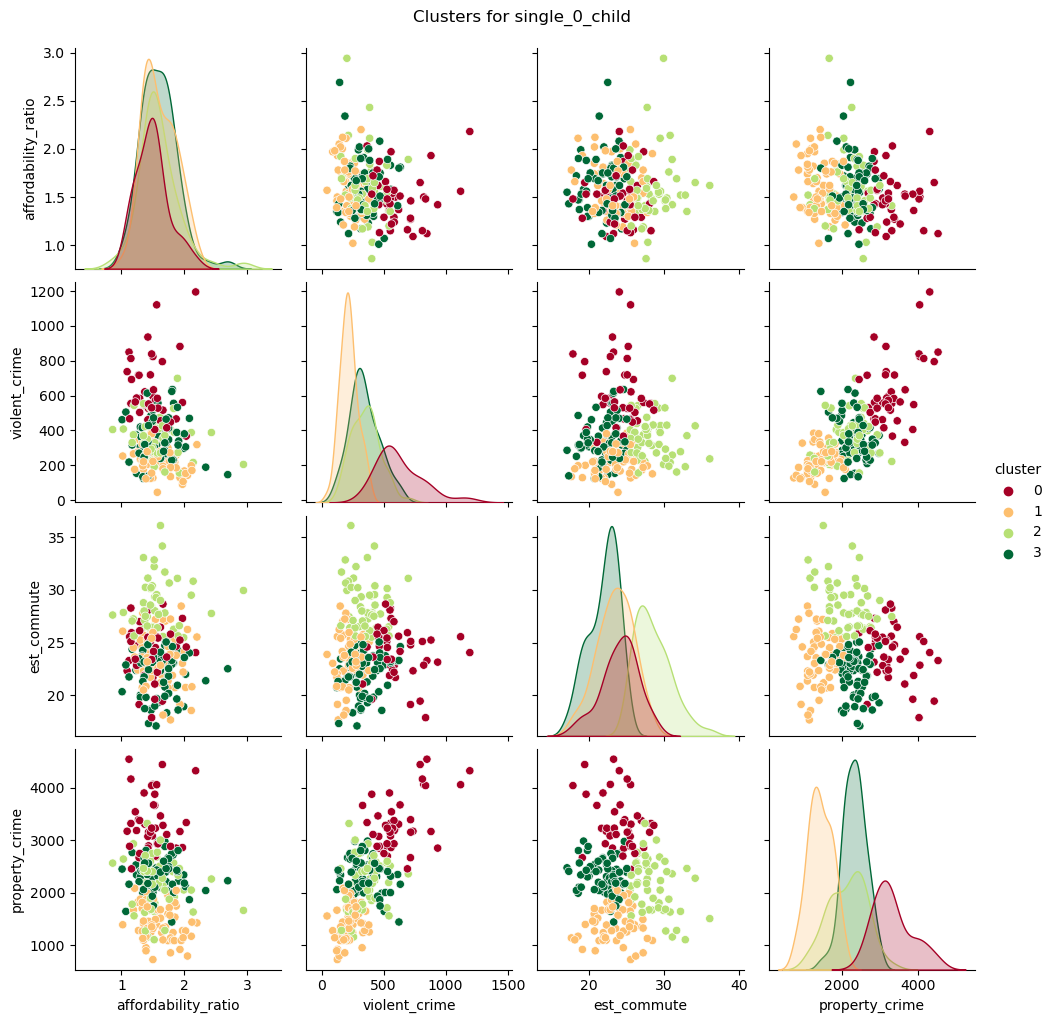

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


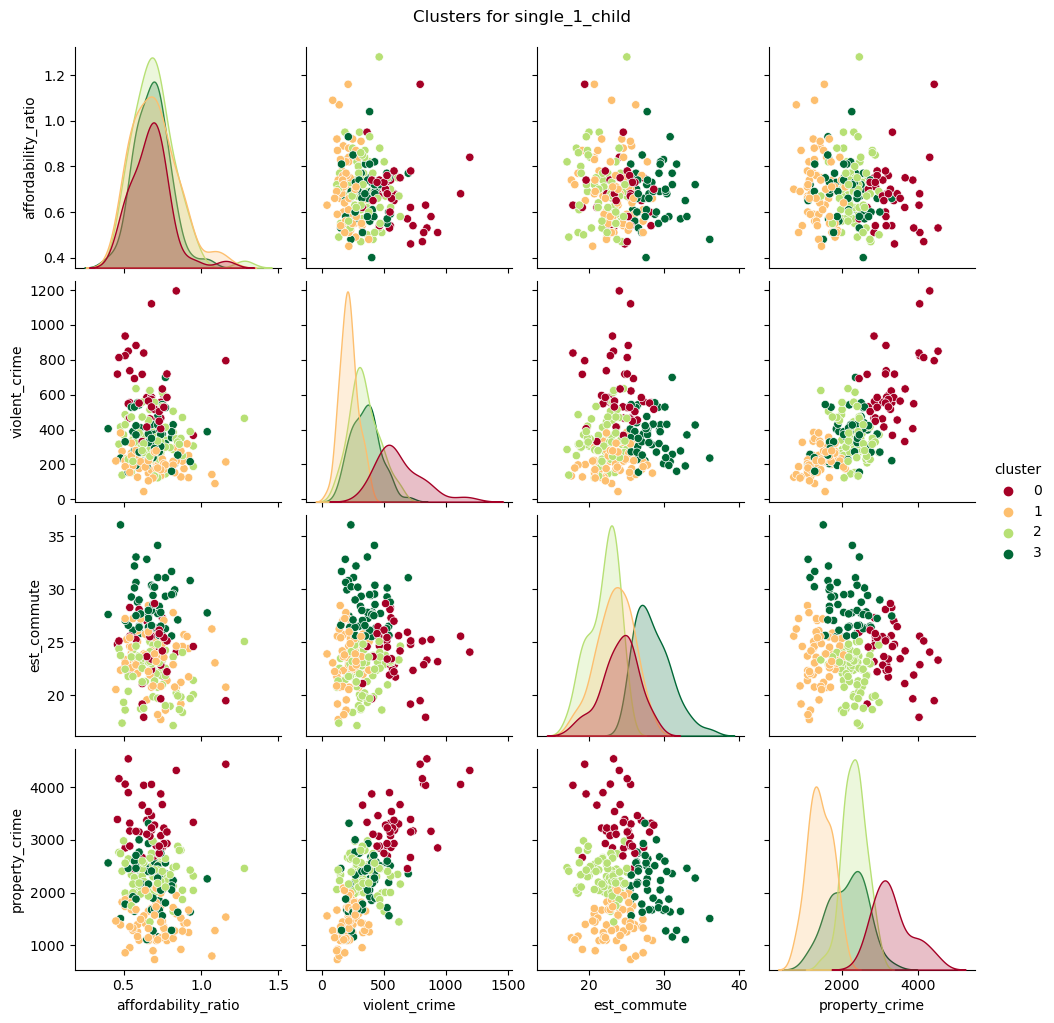

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


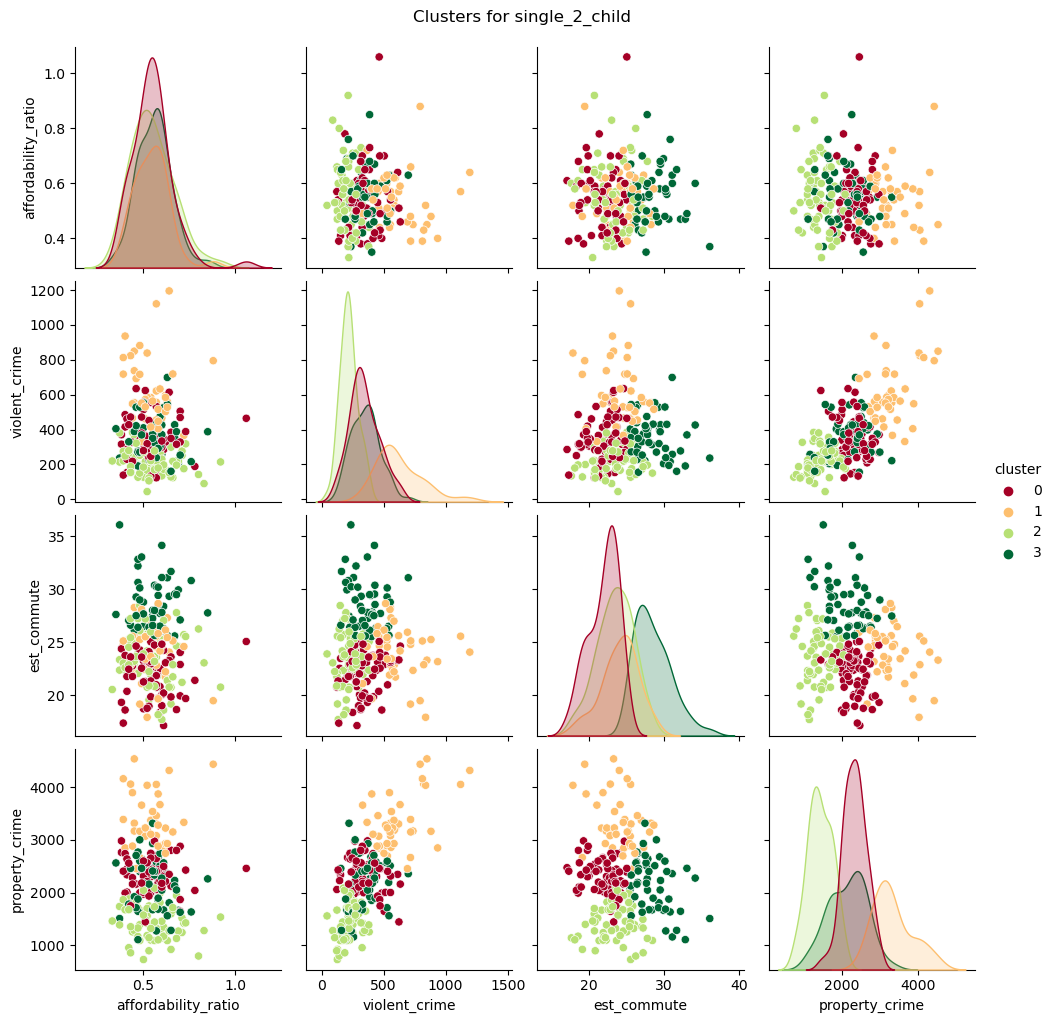

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


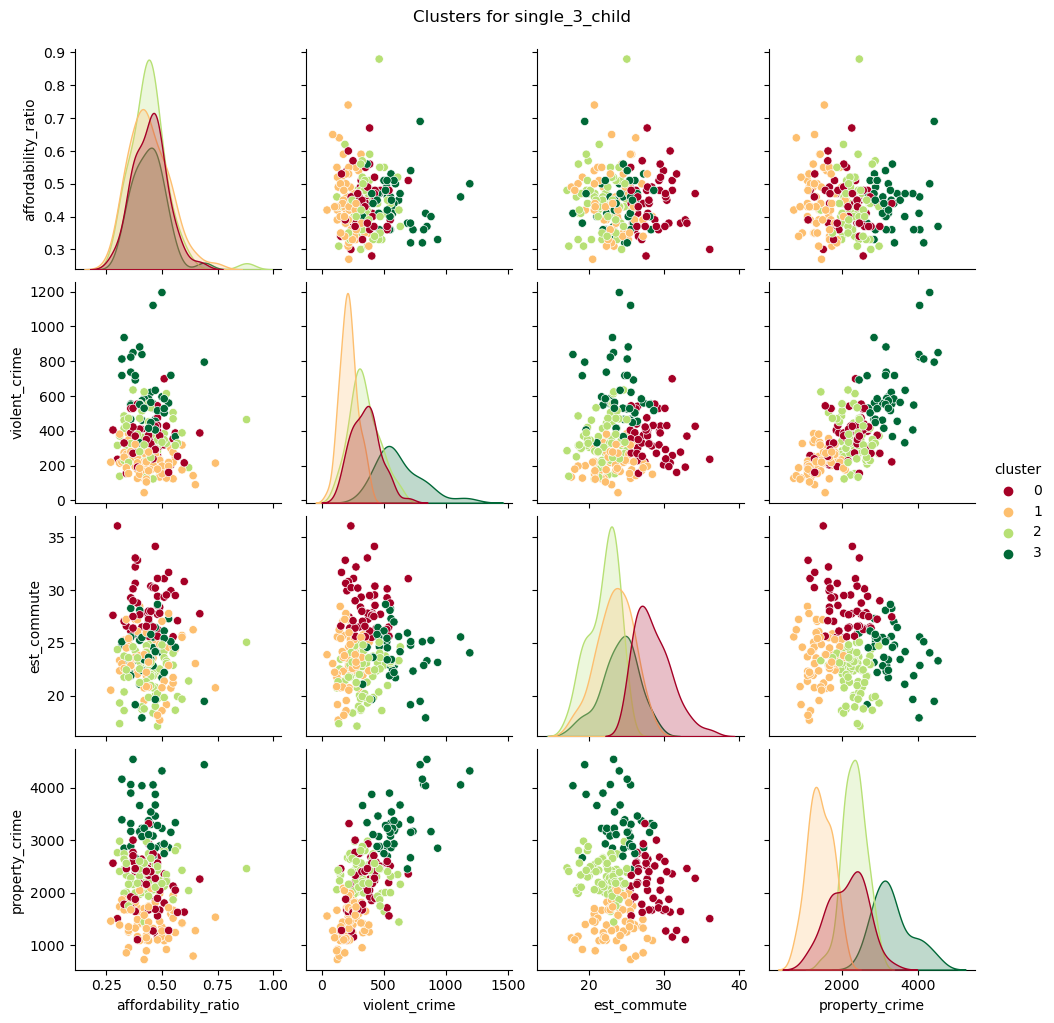

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


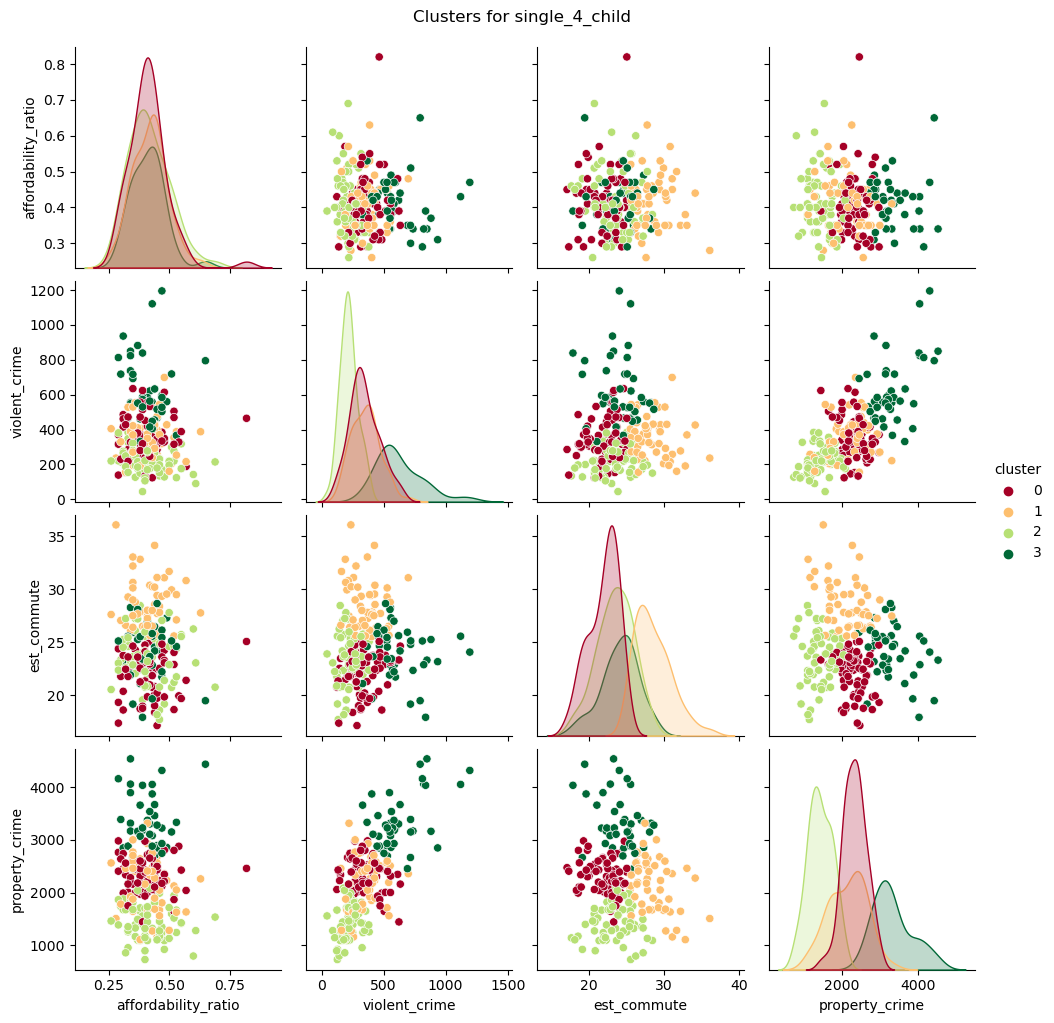

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


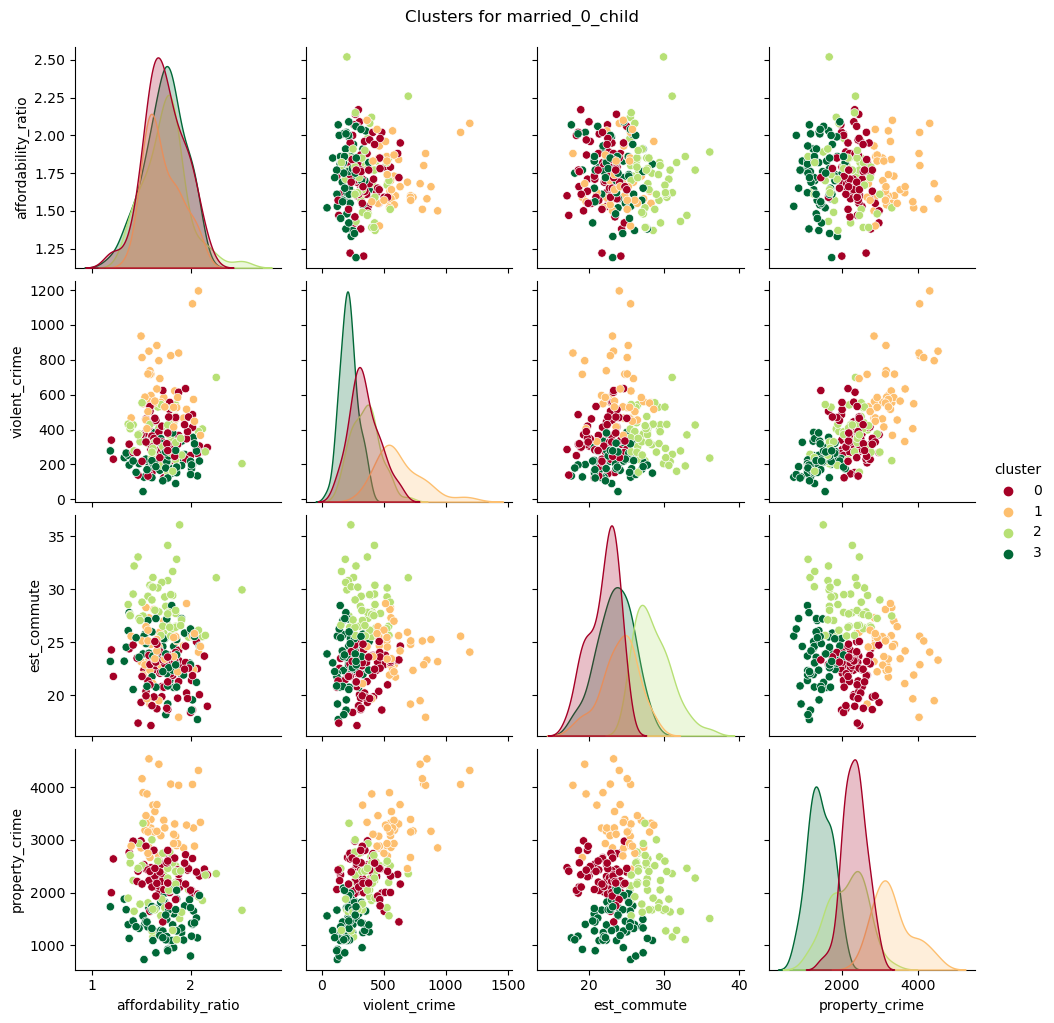

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


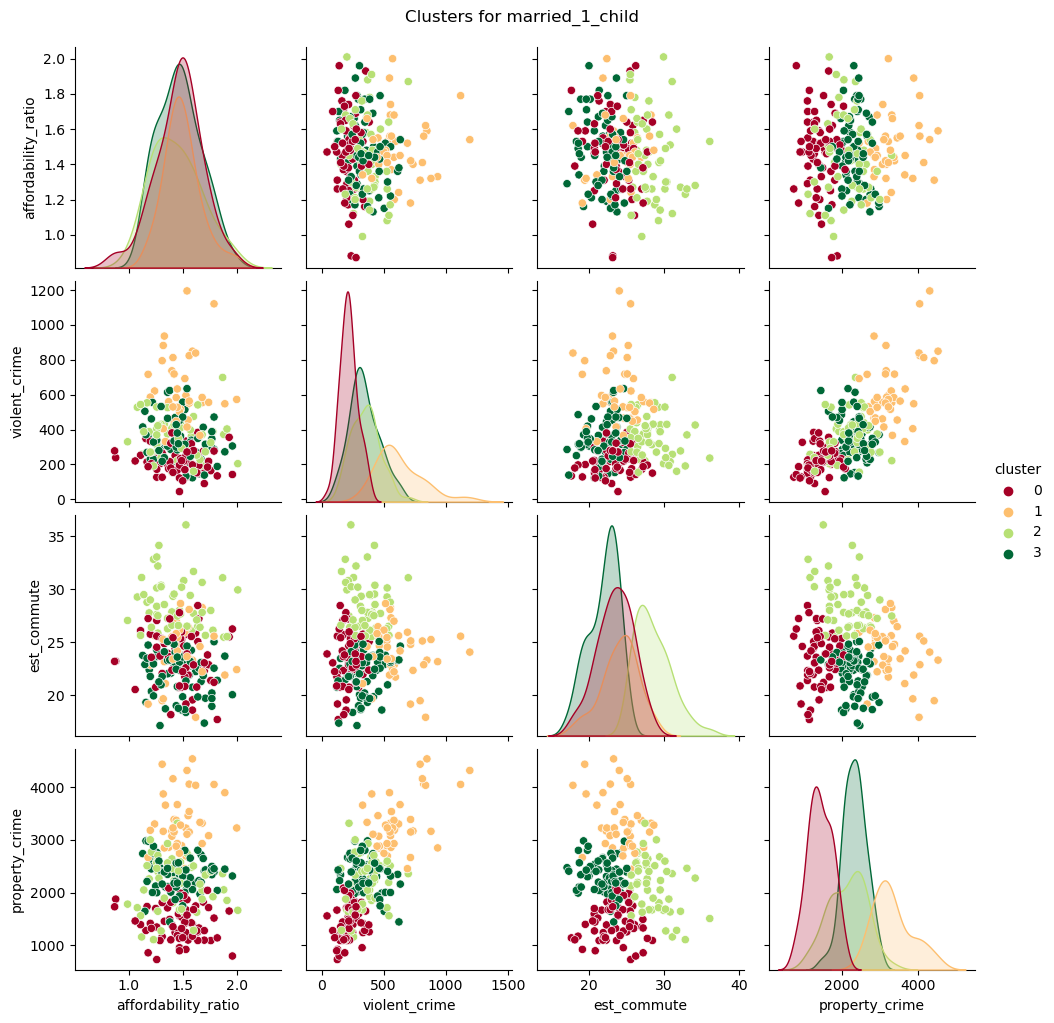

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


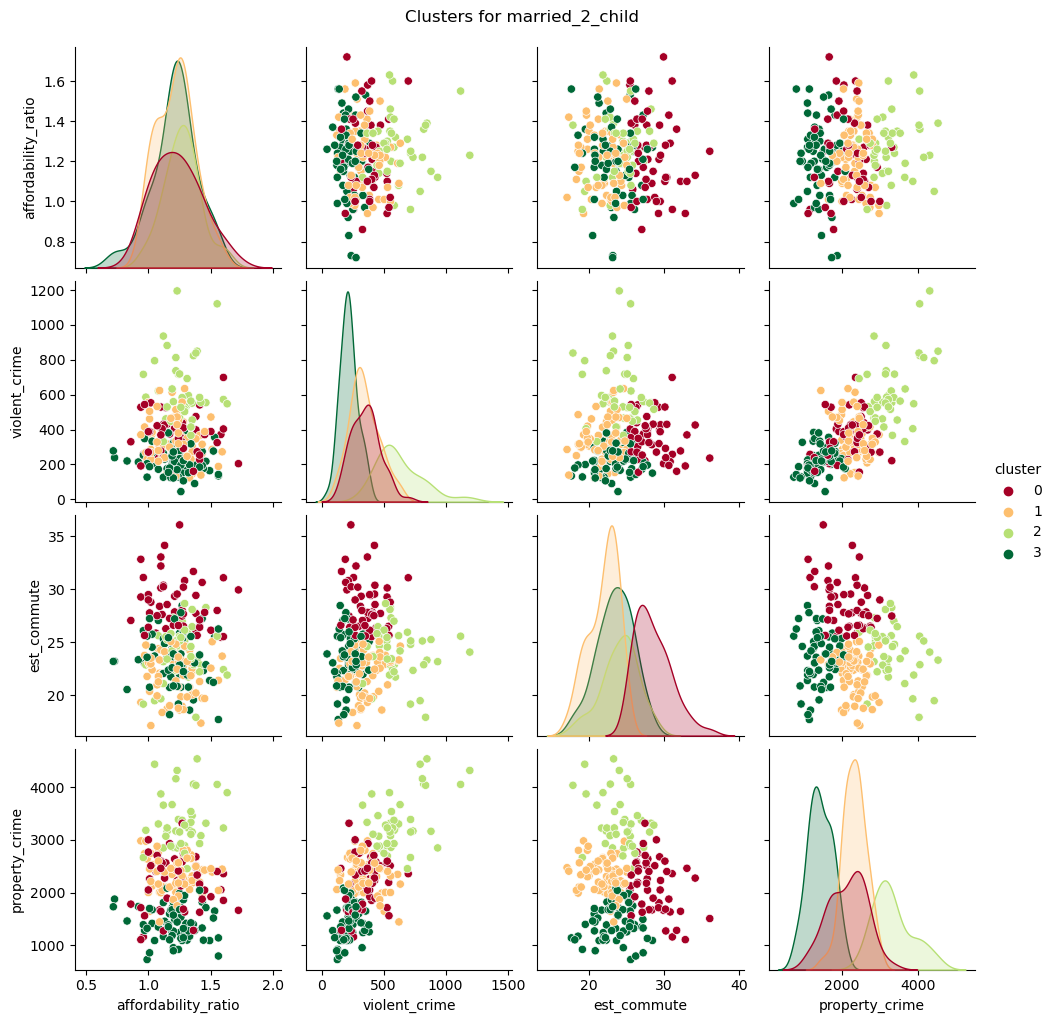

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


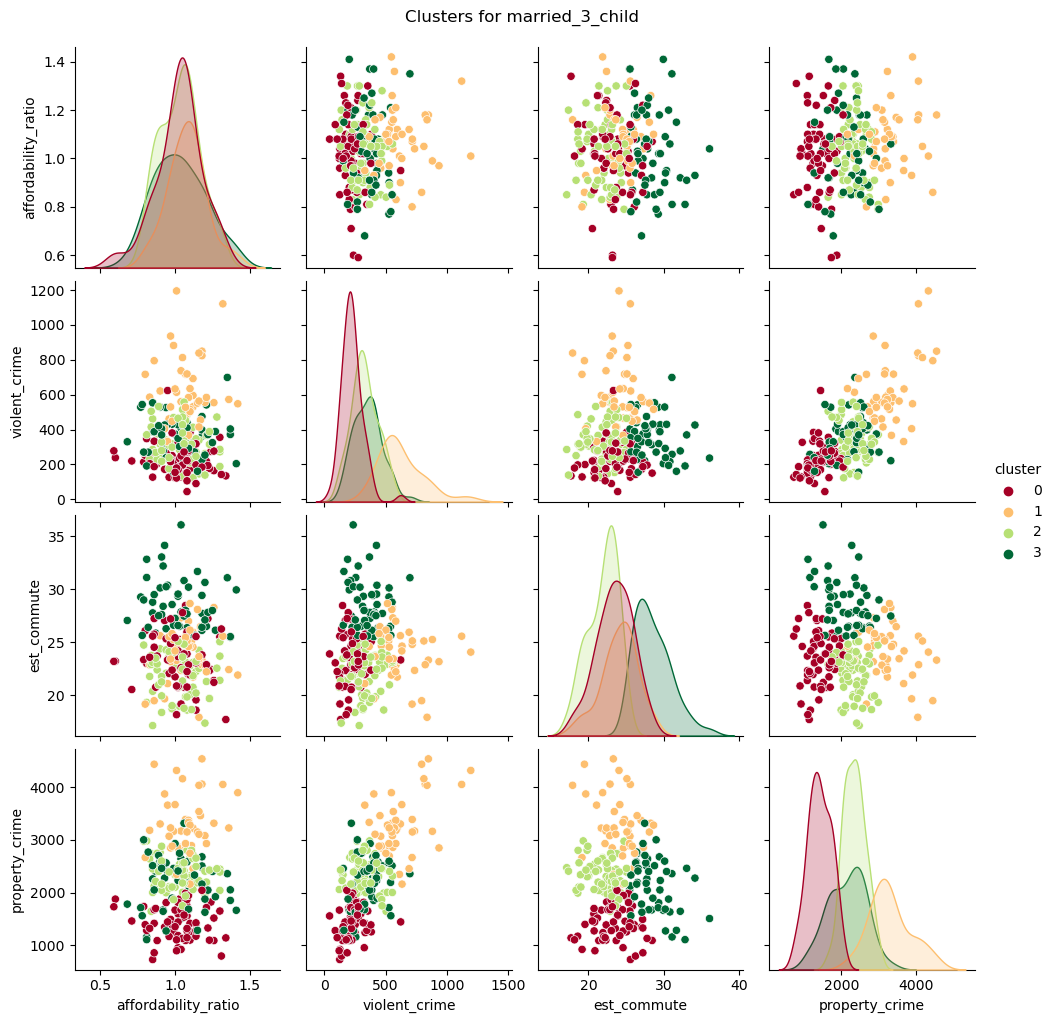

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


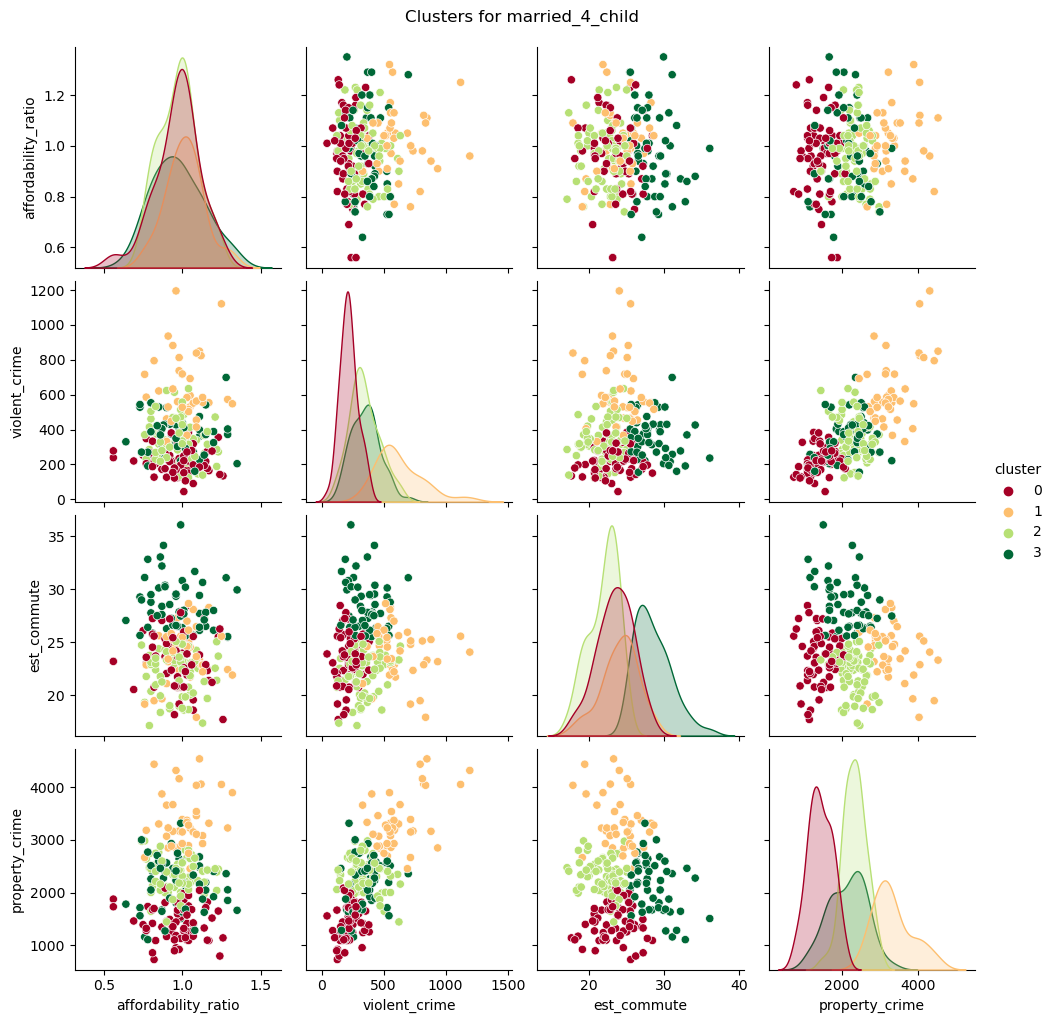

In [6]:
features = ['est_commute', 'violent_crime', 'property_crime']
ex.cluster_dataframes(df_list, features, df_names, 4, scaler=MinMaxScaler(), cluster_algo=KMeans(), plot=True)

In [7]:
single_0_child

msa  parents  children  housing  food  \
0                     Abilene, TX MSA        1         0     9246  3285   
10                      Akron, OH MSA        1         0     7402  3527   
20                     Albany, GA MSA        1         0     8160  3469   
30    Albany-Schenectady-Troy, NY MSA        1         0    10580  4010   
50                 Alexandria, LA MSA        1         0     7062  3246   
...                               ...      ...       ...      ...   ...   
2380               Wilmington, NC MSA        1         0     9861  3731   
2390            Winchester, VA-WV MSA        1         0    10645  3616   
2400                   Yakima, WA MSA        1         0     9442  3392   
2410                Yuba City, CA MSA        1         0    11443  3389   
2420                     Yuma, AZ MSA        1         0     8697  3075   

      transportation  healthcare  other  childcare  taxes  ...  \
0              11075        5873   4541          0   5109  ...   
10             10247        4696   3960          0   4800  ...   
20             11158        5612   4214          0   6275  ...   
30             10848        6178   5286          0   7376  ...   
50             11692        6043   3735          0   5604  ...   
...              ...         ...    ...        ...    ...  ...   
2380           10669        5952   4925          0   6765  ...   
2390           11850        6045   5167          0   7459  ...   
2400           12165        4416   4650          0   5118  ...   
2410           12643        5973   5374          0   7028  ...   
2420           11249        7346   4265          0   5874  ...   

      property_crime_scaled  rape_scaled  robbery_scaled  taxes_scaled  \
0                  0.361365     0.326812        0.156789      0.090042   
10                 0.347454     0.233602        0.251786      0.063719   
20                 0.698005     0.227848        0.548550      0.189369   
30                 0.267139     0.202532        0.210593      0.283159   
50                 1.000000     0.242232        0.435897      0.132209   
...                     ...          ...             ...           ...   
2380               0.381339     0.227273        0.219840      0.231110   
2390               0.145512     0.243959        0.039512      0.290229   
2400               0.490919     0.186421        0.217318      0.090808   
2410               0.454646     0.214614        0.283733      0.253514   
2420               0.262966     0.097238        0.060109      0.155209   

      total_scaled  total_commute_scaled  transportation_scaled  \
0         0.140212              0.031080               0.319138   
10        0.040721              0.147585               0.104129   
20        0.134882              0.018071               0.340691   
30        0.254081              0.198016               0.260192   
50        0.101570              0.020450               0.479356   
...            ...                   ...                    ...   
2380      0.201570              0.058039               0.213711   
2390      0.265251              0.022255               0.520384   
2400      0.141429              0.042438               0.602181   
2410      0.288874              0.026285               0.726305   
2420      0.170670              0.026833               0.364321   

      under_5_scaled  violent_crime_scaled  cluster  
0           0.067765              0.237329        3  
10          0.174511              0.284621        2  
20          0.025283              0.585326        0  
30          0.209681              0.185343        1  
50          0.034861              0.699731        0  
...              ...                   ...      ...  
2380        0.067662              0.291837        3  
2390        0.043126              0.101278        2  
2400        0.110118              0.204555        3  
2410        0.039367              0.282535        2  
2420        0.022992              0.202991        1 

<hr style="border:2px solid black">

# **Comparing Models**


<hr style="border:2px solid black">

## **Best Model Evaluation on Test**

### <u>Modeling Summary:</u>

>* 

<hr style="border:2px solid black">

# **Conclusions**


### <u>Modeling:</u>

>**<u>:</u>**
>* 

### <u>Recommendations:</u>
>* 

### <u>Next Steps:</u>
>* 